In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [56]:
import yfinance as yf
import datetime as dt

stock = "SPY"
start = dt.datetime(1993, 1, 22)
end = dt.datetime.today().strftime("%Y-%m-%d")

df = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [57]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
1993-01-29,24.526073,24.543517,24.421410,24.543517,1003200
1993-02-01,24.700521,24.700521,24.543527,24.543527,480500
1993-02-02,24.752840,24.770284,24.630733,24.683065,201300
1993-02-03,25.014498,25.031942,24.770284,24.787728,529400
1993-02-04,25.119158,25.171489,24.822612,25.101714,531500


In [19]:
df = df.reset_index()

In [20]:
df.columns

MultiIndex([(  'Date',    ''),
            ( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])

In [21]:
df.to_csv("SPY.csv")

In [22]:
data01 = pd.read_csv("SPY.csv")

In [23]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,SPY,SPY,SPY,SPY,SPY
1,0,1993-01-29,24.526073455810547,24.543517320288366,24.421410268943646,24.543517320288366,1003200
2,1,1993-02-01,24.70052146911621,24.70052146911621,24.543526629270133,24.543526629270133,480500
3,2,1993-02-02,24.752840042114258,24.770283904018495,24.63073300878459,24.683064594497303,201300
4,3,1993-02-03,25.014497756958008,25.031941618713205,24.770283692385195,24.787727554140396,529400


In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [25]:
df = df.drop(['Date'], axis = 1)

/var/folders/s9/yjnpfkfs15s92pbdhrx7zlh40000gn/T/ipykernel_75277/1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [26]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
0,24.526073,24.543517,24.421410,24.543517,1003200
1,24.700521,24.700521,24.543527,24.543527,480500
2,24.752840,24.770284,24.630733,24.683065,201300
3,25.014498,25.031942,24.770284,24.787728,529400
4,25.119158,25.171489,24.822612,25.101714,531500


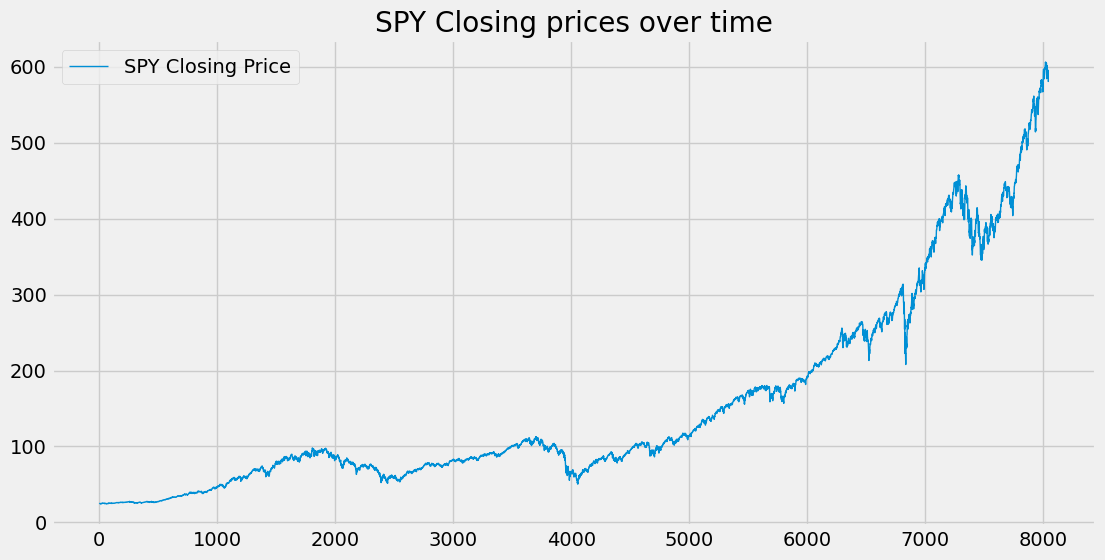

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

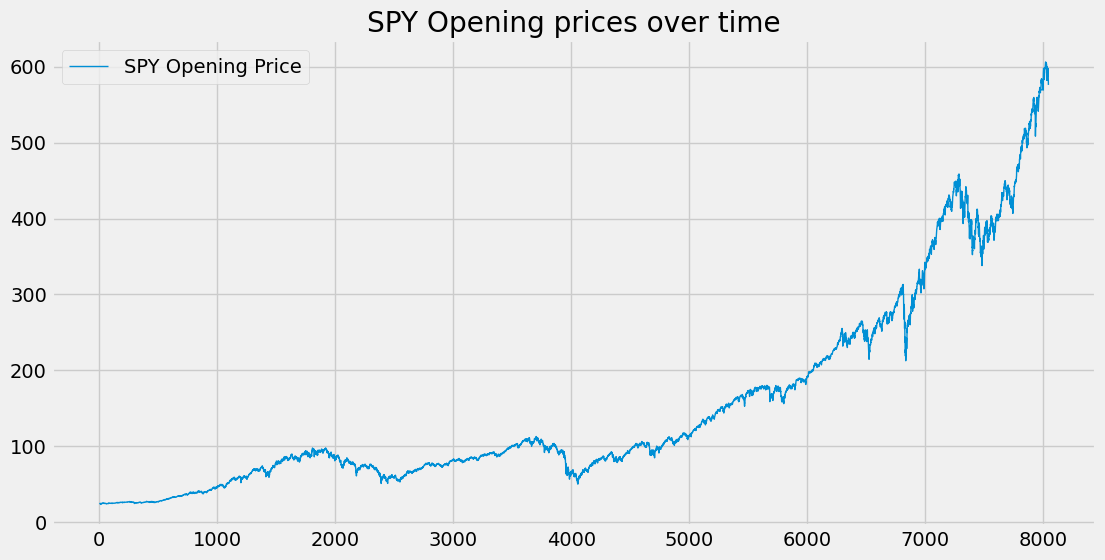

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

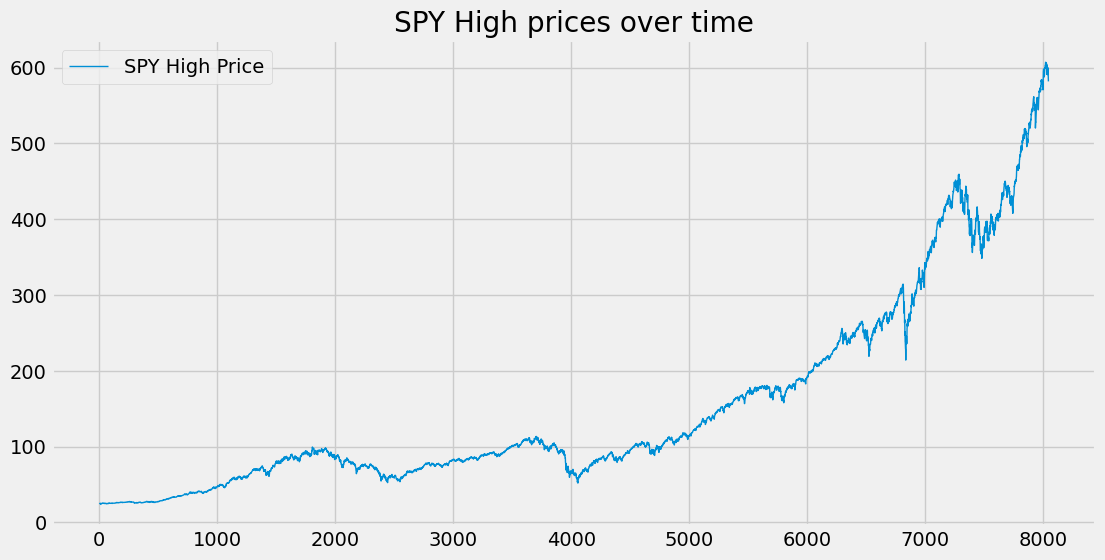

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

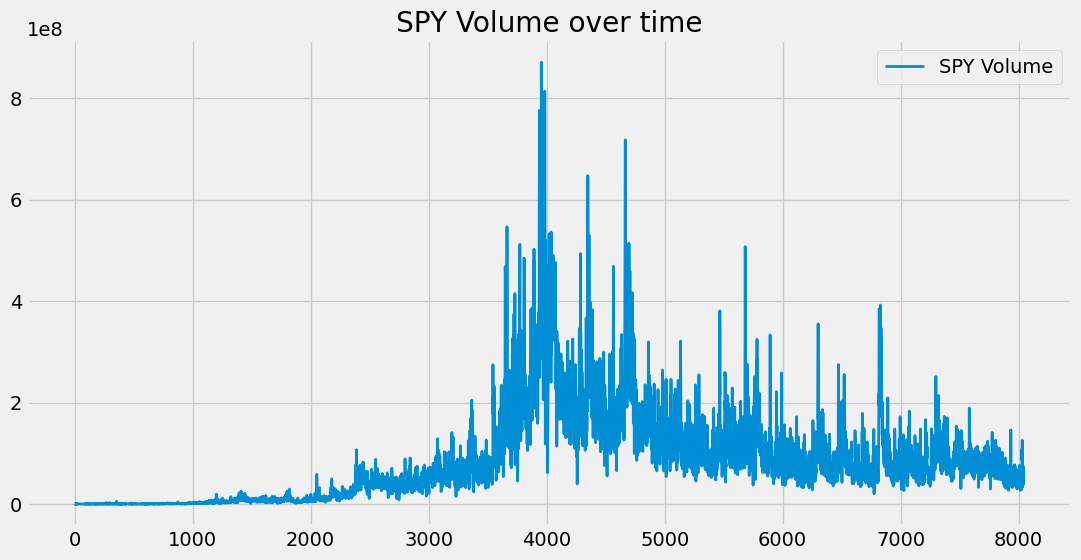

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [31]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

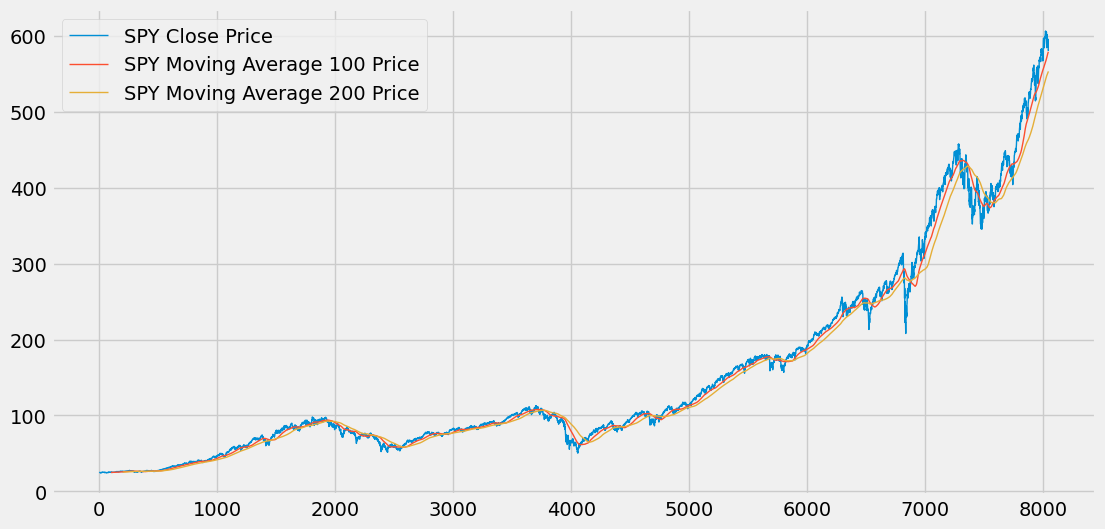

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [33]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df.Close.ewm(span=200, adjust = False).mean()

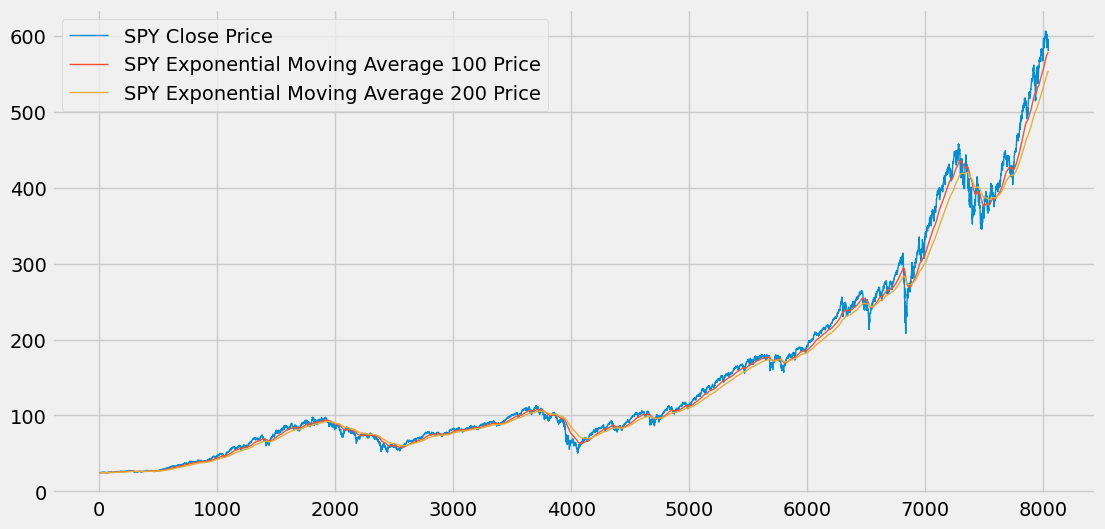

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exponential Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exponential Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [35]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(5631, 1)
(2414, 1)


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [37]:
data_training_array = scaler.fit_transform(data_training)

In [38]:
data_training_array.shape

(5631, 1)

In [39]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)
x_train.shape

(5531, 100, 1)

In [40]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [41]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()

/Users/anishkamatam/.pyenv/versions/3.10.11/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - loss: 0.0396
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - loss: 0.0051
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - loss: 0.0043
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - loss: 0.0035
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - loss: 0.0032
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - loss: 0.0029
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - loss: 0.0026
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - loss: 0.0024
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - loss: 0.0022
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - loss: 0.0021
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - loss: 0.0020
Epoch 12/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - loss: 0.0020
Epoch 13/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - loss: 0.0018
Epoch 14/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - loss: 0.0016
Epoch 15/50
173/173 ━━━━━━━━━

In [43]:
past_100_days = data_training.tail(100)

In [44]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [45]:
final_df.head()

Ticker,SPY
0,167.207474
1,169.400269
2,169.761566
3,170.618515
4,173.155792


In [46]:
input_data = scaler.fit_transform(final_df)

In [47]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [48]:
x_test.shape

(2414, 100, 1)

In [49]:
y_predicted = model.predict(x_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [50]:
y_predicted.shape

(2414, 1)

In [51]:
scaler.scale_

array([0.00222732])

In [52]:
scaler_factor = 1 / 0.00222732
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

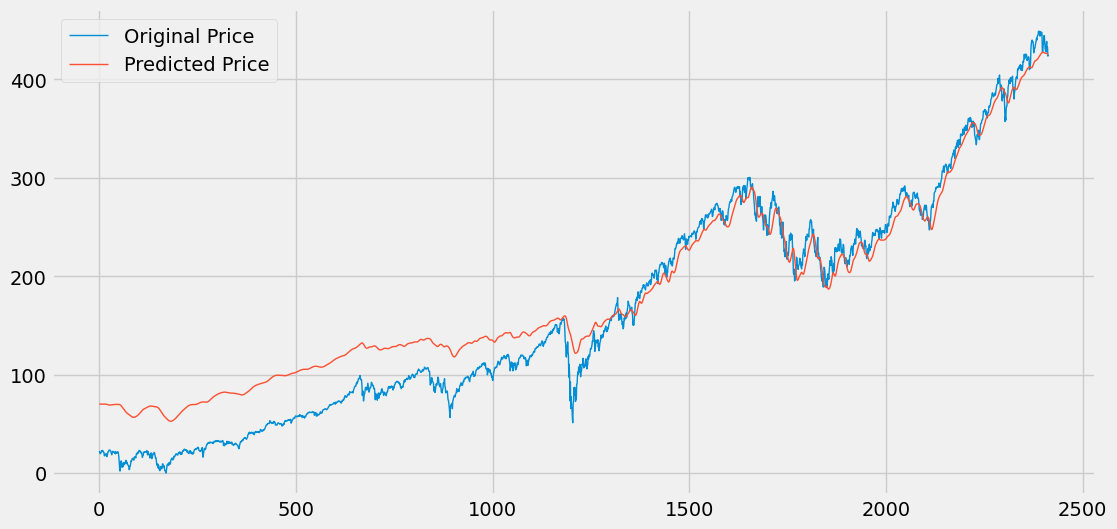

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [54]:
model.save('stock_dl_model.h5')